In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/rumah.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_name          7609 non-null   object
 1   location            7609 non-null   object
 2   bedroom_count       7609 non-null   int64 
 3   bathroom_count      7609 non-null   int64 
 4   carport_count       7609 non-null   int64 
 5   price               7609 non-null   int64 
 6   land_area           7609 non-null   int64 
 7   building_area (m2)  7609 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 475.7+ KB
None


In [7]:
print(df.isnull().sum())

house_name            0
location              0
bedroom_count         0
bathroom_count        0
carport_count         0
price                 0
land_area             0
building_area (m2)    0
dtype: int64


In [8]:
duplicates = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicates)}")

Jumlah baris duplikat: 617


In [9]:
df = df.drop_duplicates()

In [10]:
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris setelah menghapus duplikat: 6992


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6992 entries, 0 to 7608
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_name          6992 non-null   object
 1   location            6992 non-null   object
 2   bedroom_count       6992 non-null   int64 
 3   bathroom_count      6992 non-null   int64 
 4   carport_count       6992 non-null   int64 
 5   price               6992 non-null   int64 
 6   land_area           6992 non-null   int64 
 7   building_area (m2)  6992 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 491.6+ KB
None


In [13]:
df = df.drop(columns=['house_name'])

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6992 entries, 0 to 7608
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            6992 non-null   object
 1   bedroom_count       6992 non-null   int64 
 2   bathroom_count      6992 non-null   int64 
 3   carport_count       6992 non-null   int64 
 4   price               6992 non-null   int64 
 5   land_area           6992 non-null   int64 
 6   building_area (m2)  6992 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 437.0+ KB
None


In [15]:
print(df.head())

         location  bedroom_count  bathroom_count  carport_count       price  \
0  Andir, Bandung              3               2              2  2100000000   
1  Andir, Bandung              3               2              3  4100000000   
2  Andir, Bandung              5               2              1  3300000000   
3  Andir, Bandung              2               2              1   580000000   
4  Andir, Bandung             11               3              0  1300000000   

   land_area  building_area (m2)  
0        137                 170  
1        202                 300  
2        350                 258  
3         30                  80  
4        176                 176  


In [16]:
# Lakukan One-Hot Encoding pada kolom kategorikal 'location'
df = pd.get_dummies(df, columns=['location'], drop_first=True)

In [17]:
print(df.head())

   bedroom_count  bathroom_count  carport_count       price  land_area  \
0              3               2              2  2100000000        137   
1              3               2              3  4100000000        202   
2              5               2              1  3300000000        350   
3              2               2              1   580000000         30   
4             11               3              0  1300000000        176   

   building_area (m2)  location_Antapani, Bandung  \
0                 170                       False   
1                 300                       False   
2                 258                       False   
3                  80                       False   
4                 176                       False   

   location_Arcamanik, Bandung  location_Astanaanyar, Bandung  \
0                        False                          False   
1                        False                          False   
2                        False           

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6992 entries, 0 to 7608
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   bedroom_count                       6992 non-null   int64
 1   bathroom_count                      6992 non-null   int64
 2   carport_count                       6992 non-null   int64
 3   price                               6992 non-null   int64
 4   land_area                           6992 non-null   int64
 5   building_area (m2)                  6992 non-null   int64
 6   location_Antapani, Bandung          6992 non-null   bool 
 7   location_Arcamanik, Bandung         6992 non-null   bool 
 8   location_Astanaanyar, Bandung       6992 non-null   bool 
 9   location_Babakanciparay, Bandung    6992 non-null   bool 
 10  location_Bandung Kidul, Bandung     6992 non-null   bool 
 11  location_Bandung Kulon, Bandung     6992 non-null   bool 
 12  location_Ba

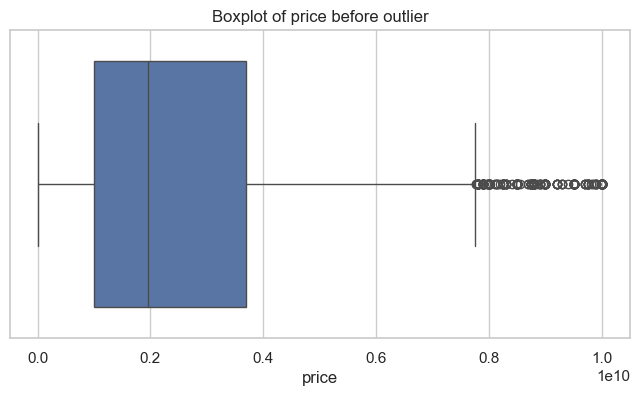

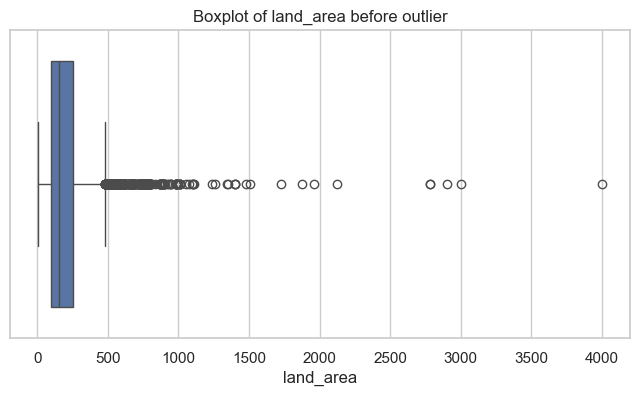

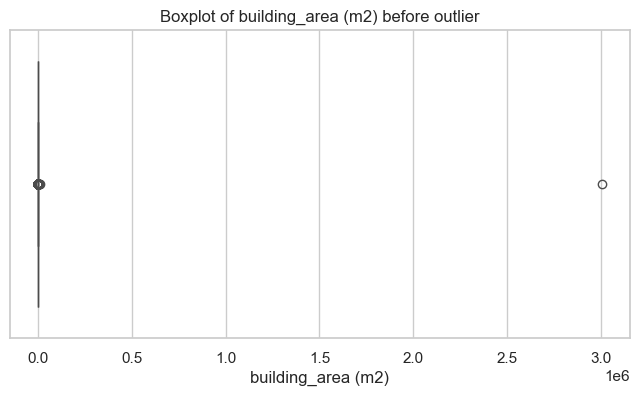

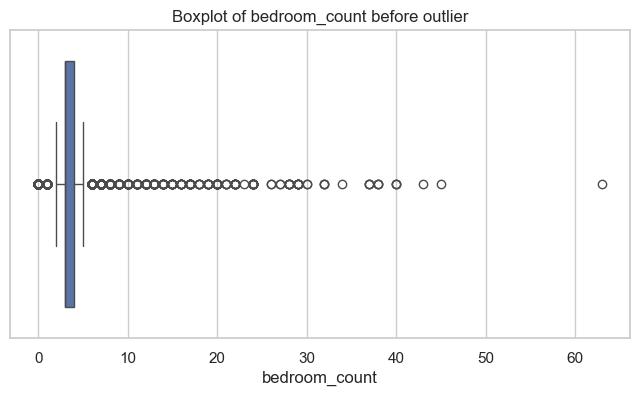

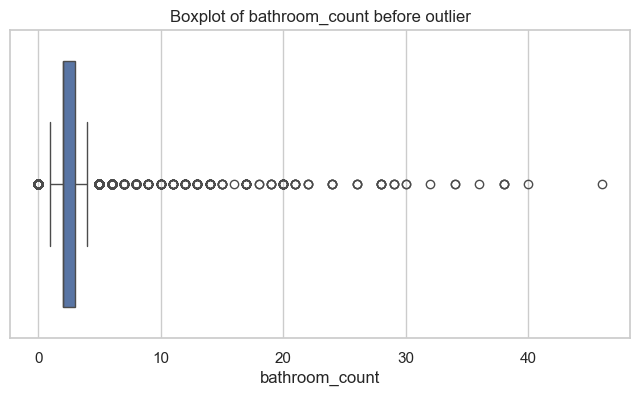

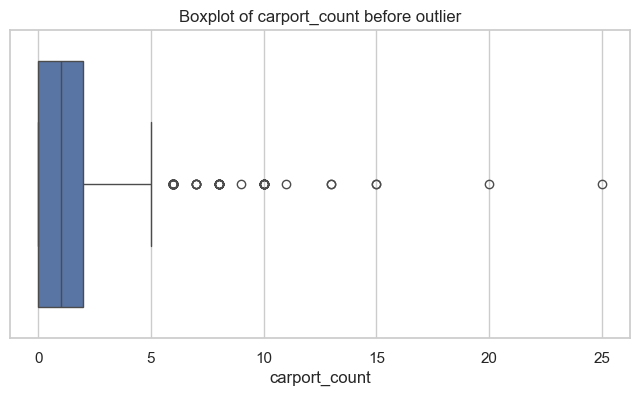

In [33]:
numerical_columns = ['price', 'land_area', 'building_area (m2)', 'bedroom_count', 'bathroom_count', 'carport_count']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} before outlier')
    plt.show()

In [23]:
before = len(df)
print(f"Jumlah data sebelum penghapusan outlier: {before}")

Jumlah data sebelum penghapusan outlier: 7609


In [24]:
# Menghapus outlier pada kolom 'price' menggunakan metode IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]


In [25]:
after = len(df)
print(f"Jumlah data setelah penghapusan outlier: {after}")
print(f"Jumlah data yang dihapus: {before - after}")

Jumlah data setelah penghapusan outlier: 6848
Jumlah data yang dihapus: 761


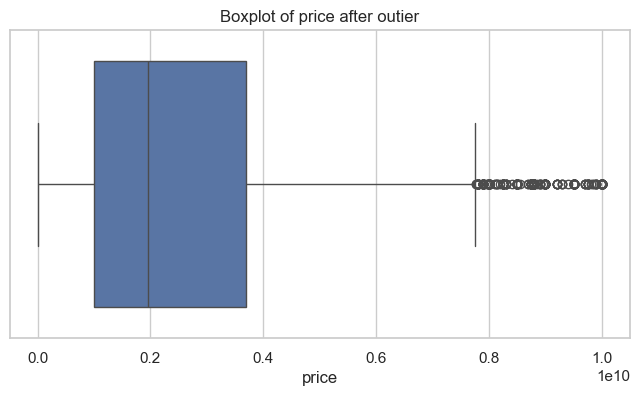

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title(f'Boxplot of {'price'} after outier')
plt.show()

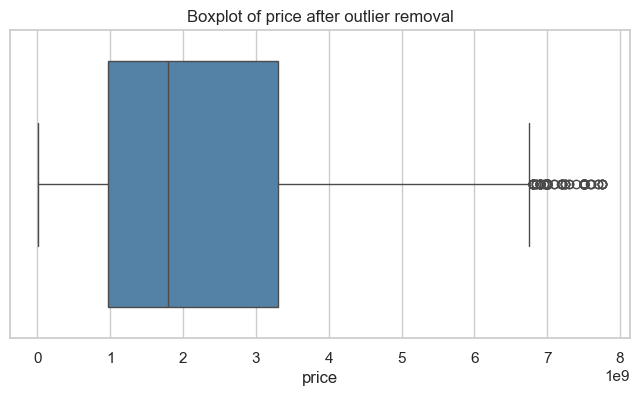

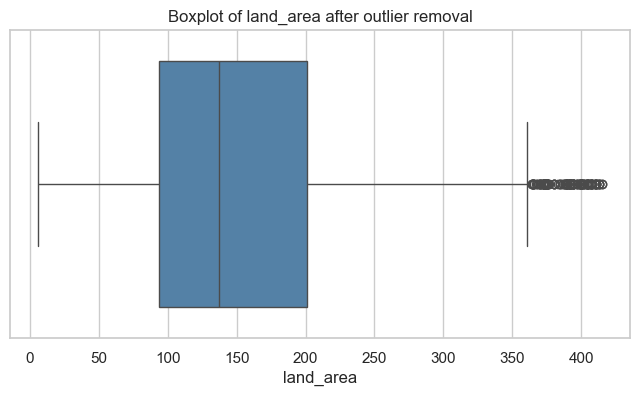

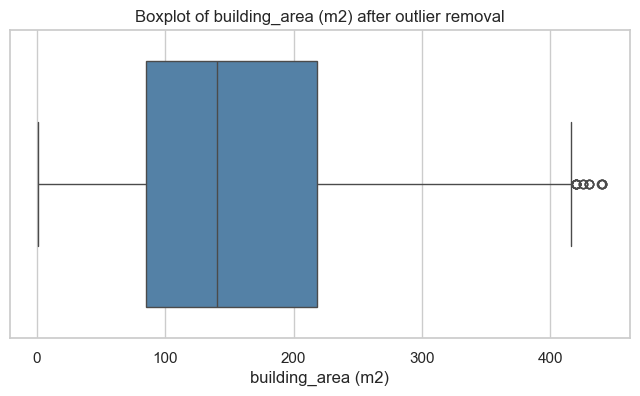

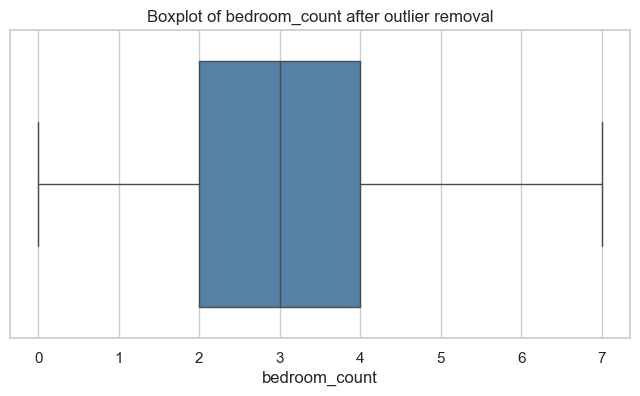

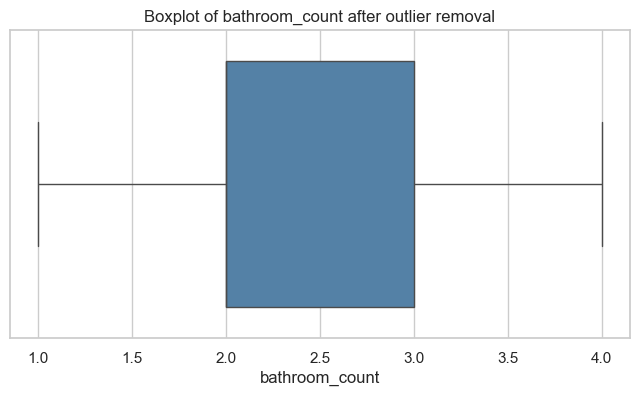

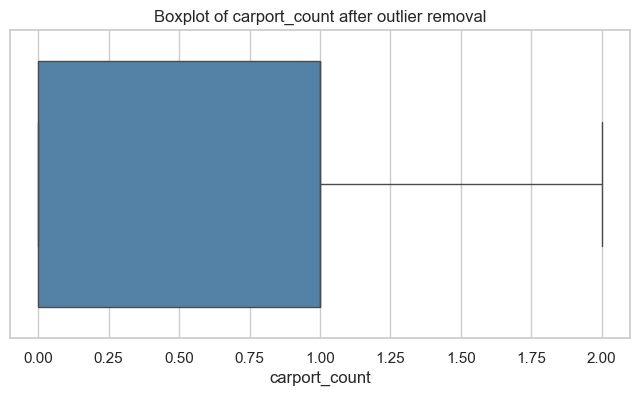

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['price', 'land_area', 'building_area (m2)', 'bedroom_count', 'bathroom_count', 'carport_count']

# Salin dataframe untuk backup
df_cleaned = df.copy()

# Bersihkan outlier di setiap kolom numerik
for col in numerical_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter baris yang bukan outlier
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    # Tampilkan boxplot hasilnya
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col], color='steelblue')
    plt.title(f'Boxplot of {col} after outlier removal')
    plt.show()
